<a href="https://colab.research.google.com/github/Raghu3454/yolo-object-detection/blob/main/YoloBasedObject_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Ultralytics YOLOv8 library
!pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.6 MB/s eta 0:00:00


In [5]:
# Import YOLO model
from ultralytics import YOLO

# Image processing
import cv2
import matplotlib.pyplot as plt

# For uploading image
from google.colab import files


In [6]:
# Load YOLOv8 Nano model (lightweight and fast)
model = YOLO("yolov8n.pt")

print("YOLOv8 Model Loaded Successfully!")


YOLOv8 Model Loaded Successfully!


In [8]:
#uploading images
# Upload image from local system
uploaded = files.upload()



Saving IMG-20251122-WA0029.jpg to IMG-20251122-WA0029.jpg
Saving IMG-20251122-WA0032.jpg to IMG-20251122-WA0032.jpg
Saving person2.jpg to person2.jpg
Saving WhatsApp Image 2025-11-22 at 13.36.45_a94d2866.jpg to WhatsApp Image 2025-11-22 at 13.36.45_a94d2866.jpg
Saving WhatsApp Image 2025-11-22 at 13.36.56_19fa0b36.jpg to WhatsApp Image 2025-11-22 at 13.36.56_19fa0b36.jpg
Saving WhatsApp Image 2025-11-22 at 13.36.56_2081e6e7.jpg to WhatsApp Image 2025-11-22 at 13.36.56_2081e6e7.jpg


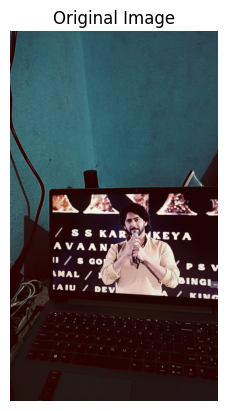


image 1/1 /content/person2.jpg: 640x384 1 person, 1 laptop, 151.4ms
Speed: 3.9ms preprocess, 151.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 384)
Detection Completed!


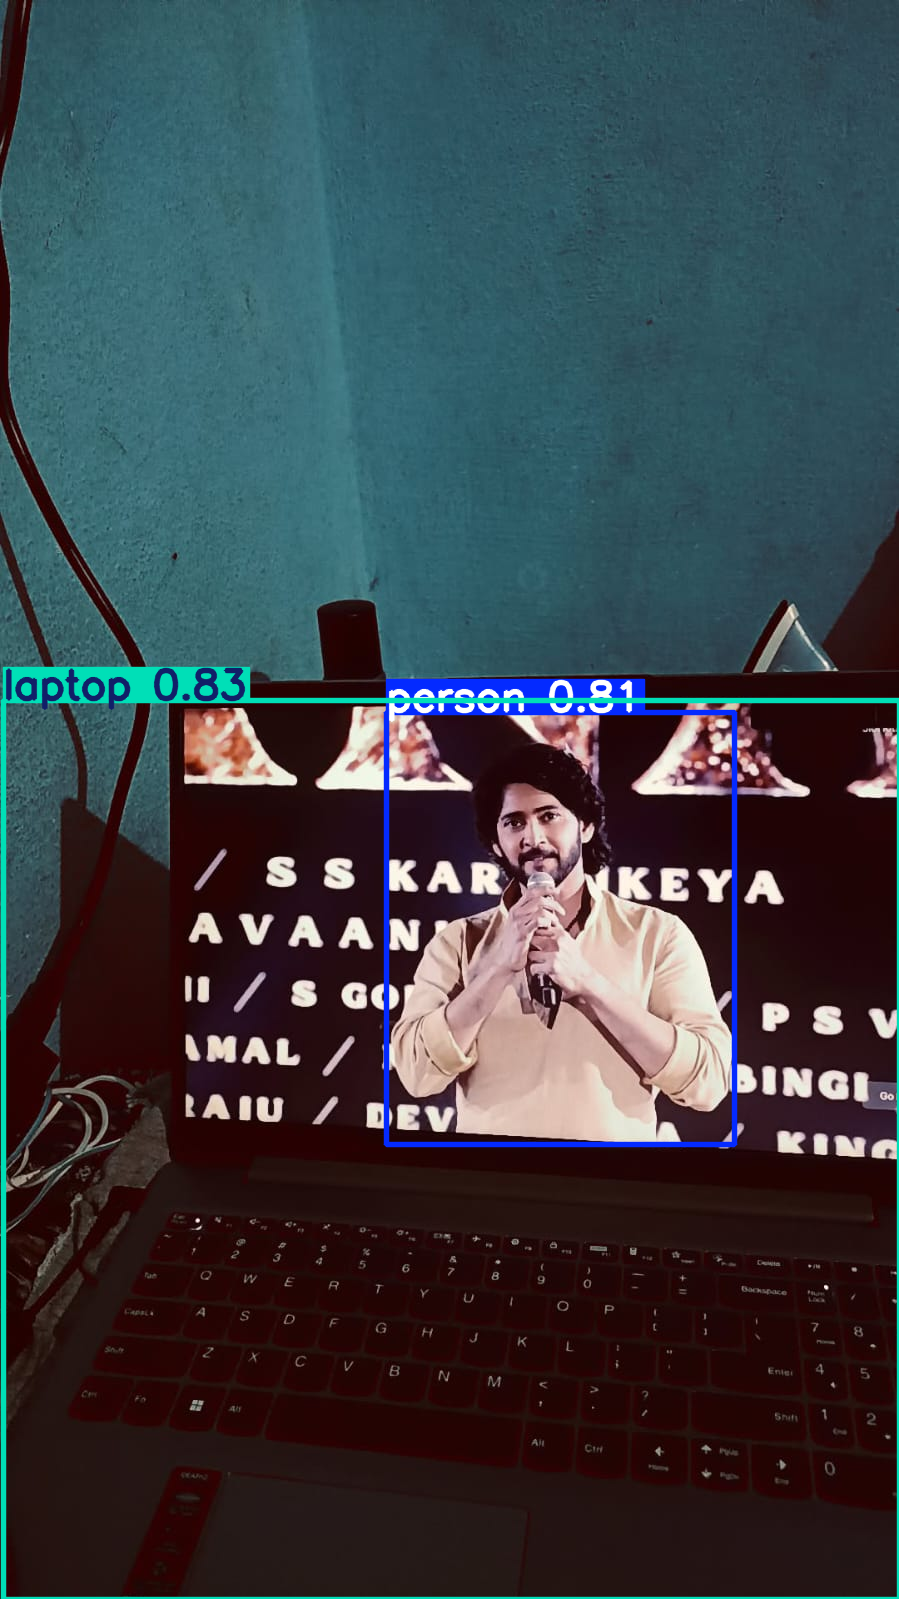

Output image saved as output.jpg


In [14]:
image_path = "person2.jpg"  # Change if needed

# Read image
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()
# Run YOLO detection
results = model(image_path)

print("Detection Completed!")
# Display detected image with bounding boxes
results[0].show()
# Save detection result
results[0].save("output.jpg")

print("Output image saved as output.jpg")




In [15]:
# Print detected objects
for box in results[0].boxes:
    class_id = int(box.cls)
    confidence = float(box.conf)

    print("Detected Class ID:", class_id)
    print("Confidence Score:", confidence)
    print("--------------------------")


Detected Class ID: 63
Confidence Score: 0.833746075630188
--------------------------
Detected Class ID: 0
Confidence Score: 0.8145371079444885
--------------------------



image 1/1 /content/test.jpg: 640x480 4 persons, 1 bus, 1 stop sign, 202.1ms
Speed: 4.0ms preprocess, 202.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


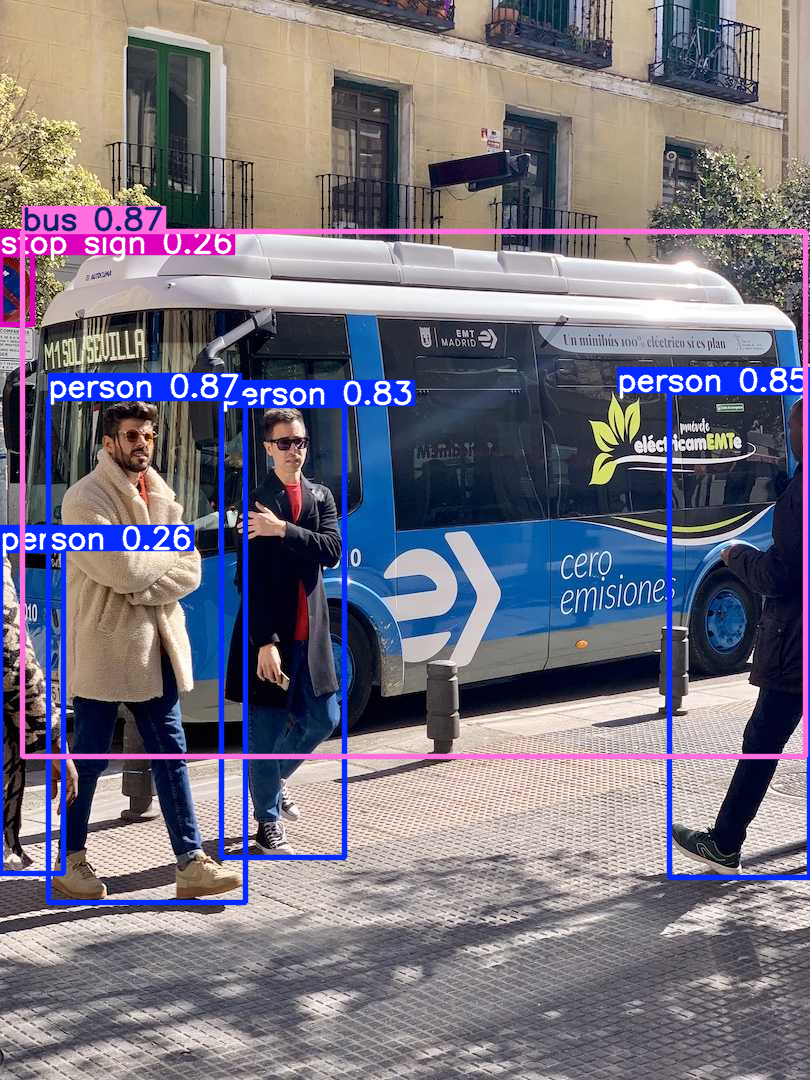

In [16]:
import requests

url = "https://ultralytics.com/images/bus.jpg"

response = requests.get(url)
with open("test.jpg", "wb") as f:
    f.write(response.content)

results = model("test.jpg")
results[0].show()
